In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run additional.ipynb

In [3]:
pandas.set_option('display.max_colwidth', 140)

# HLT1 track classifier

## Training channels (read data)

We will use all possible

In [4]:
bck_train_mode_name = 30000000
sig_train_modes_names = list(set(empty_events.keys()) - {bck_train_mode_name})
sig_train_files = ['mod_{}.csv'.format(name) for name in sig_train_modes_names]
bck_train_files = 'mod_30000000.csv'
folder = "datasets/prepared_hlt_track/"

In [5]:
# concat all signal data
if not os.path.exists(folder + 'signal_track.csv'):
    concat_files(folder, sig_train_files, os.path.join(folder , 'signal_track.csv'))

In [6]:
signal_data = pandas.read_csv(os.path.join(folder, 'signal_track.csv'), sep='\t')
bck_data = pandas.read_csv(os.path.join(folder, bck_train_files), sep='\t')

In [7]:
signal_data.columns

Index([u'unique', u'mode', u'event_number', u'trk_number', u'pass_trk',
       u'signal', u'pt', u'p', u'ip', u'ipchi2', u'nvelo', u'nt', u'chi2',
       u'ismu', u'good', u'sig'],
      dtype='object')

## Counting events and svrs,
that passed **L0** and **GoodGenB** preselection (this data was generated by skim)

In [8]:
print 'Signal', statistic_length(signal_data)
print 'Bck', statistic_length(bck_data)

Signal {'SVR': 9126936, 'Events': 587497}
Bck {'SVR': 1404261, 'Events': 110520}


In [9]:
total_bck_events = statistic_length(bck_data)['Events'] + empty_events[bck_train_mode_name]
total_signal_events_by_mode = dict()
for mode in sig_train_modes_names:
    total_signal_events_by_mode[mode] = statistic_length(signal_data[signal_data['mode'] == mode])['Events'] + empty_events[mode]

### events distribution by mode

In [10]:
print 'Bck:', total_bck_events
'Signal:', total_signal_events_by_mode

Bck: 183791


('Signal:',
 {11102003: 23299,
  11104121: 23321,
  11114001: 62834,
  11114101: 38503,
  11124001: 0,
  11296013: 17233,
  11536011: 14050,
  11874004: 27792,
  11874042: 4039,
  12103035: 25963,
  12103121: 25697,
  12165106: 0,
  12265042: 0,
  12873002: 9797,
  12873432: 0,
  12875500: 0,
  13102201: 0,
  13102412: 34782,
  13104012: 0,
  13112001: 36061,
  13144001: 55645,
  13144020: 40397,
  13246001: 38151,
  13264021: 25563,
  13512010: 46435,
  13774002: 12938,
  15164001: 7273,
  15512011: 29846,
  20000000: 0,
  21263002: 9707,
  23103110: 0,
  25103000: 0,
  25103110: 0,
  27163002: 977,
  27163400: 469,
  27265001: 1015,
  27265101: 2699})

## Define variables

We will use two sets of variables

In [11]:
variables_base = ["pt", "ipchi2"]

## Counting events and svrs,

which passed **pass_trk** (equivalent Mike's preselections for nbody selection)

In [12]:
# hlt1 track selection
signal_data = signal_data[signal_data['pass_trk'] == 1]
bck_data = bck_data[bck_data['pass_trk'] == 1]

In [13]:
print 'Signal', statistic_length(signal_data)
print 'Bck', statistic_length(bck_data)

Signal {'SVR': 2092390, 'Events': 576519}
Bck {'SVR': 316559, 'Events': 95858}


In [14]:
total_signal_events_by_mode_presel = dict()
for mode in sig_train_modes_names:
    total_signal_events_by_mode_presel[mode] = statistic_length(signal_data[signal_data['mode'] == mode])['Events']
total_bck_events_presel = statistic_length(bck_data)['Events']

### events distribution by mode

In [15]:
print 'Bck:', total_bck_events_presel
'Signal:', total_signal_events_by_mode_presel

Bck: 95858


('Signal:',
 {11102003: 21776,
  11104121: 21285,
  11114001: 60684,
  11114101: 35702,
  11124001: 0,
  11296013: 17129,
  11536011: 13834,
  11874004: 27067,
  11874042: 3926,
  12103035: 24897,
  12103121: 20015,
  12165106: 0,
  12265042: 0,
  12873002: 9404,
  12873432: 0,
  12875500: 0,
  13102201: 0,
  13102412: 30400,
  13104012: 0,
  13112001: 34367,
  13144001: 53937,
  13144020: 39012,
  13246001: 37152,
  13264021: 25042,
  13512010: 42211,
  13774002: 12503,
  15164001: 7074,
  15512011: 26855,
  20000000: 0,
  21263002: 8472,
  23103110: 0,
  25103000: 0,
  25103110: 0,
  27163002: 775,
  27163400: 333,
  27265001: 792,
  27265101: 1875})

In [16]:
signal_data.head()

,unique,mode,event_number,trk_number,pass_trk,signal,pt,p,ip,ipchi2,nvelo,nt,chi2,ismu,good,sig
0,13144001_0,13144001,0,0,1,1,1390.58,23691.70,0.170297,52.7346,19,24,1.07259,0,1,1
7,13144001_0,13144001,0,7,1,1,1072.72,16412.20,0.134709,22.5363,15,19,1.09721,0,1,1
8,13144001_0,13144001,0,8,1,1,1234.32,15950.30,1.033650,712.2440,12,19,1.26025,1,1,1
11,13144001_0,13144001,0,11,1,1,1848.32,9100.94,1.320430,3941.8900,12,20,1.31286,1,1,1
14,13144001_0,13144001,0,14,1,1,1234.32,15950.30,1.033630,711.8770,12,19,1.25972,1,1,1


## Prepare train/test splitting

Divide events which passed alll preselections into two equal parts randomly

In [17]:
ds_train_signal, ds_train_bck, ds_test_signal, ds_test_bck = prepare_data(signal_data, bck_data, 'unique')

### train: counting events and svrs

In [18]:
print 'Signal', statistic_length(ds_train_signal)
print 'Bck', statistic_length(ds_train_bck)

Signal {'SVR': 1045984, 'Events': 288259}
Bck {'SVR': 158294, 'Events': 47929}


In [19]:
train = pandas.concat([ds_train_bck, ds_train_signal])

### test: counting events and svrs

In [20]:
print 'Signal', statistic_length(ds_test_signal)
print 'Bck', statistic_length(ds_test_bck)

Signal {'SVR': 1046406, 'Events': 288260}
Bck {'SVR': 158265, 'Events': 47929}


In [21]:
test = pandas.concat([ds_test_bck, ds_test_signal])

## Define all total events in test samples
(which passed just l0 and goodgenB) using also empty events. Suppose that events which didn't pass **pass_2trk** also were equal randomly divided into training and test samples 

In [22]:
total_test_bck_events = (total_bck_events - total_bck_events_presel) // 2 + statistic_length(ds_test_bck)['Events']
total_test_signal_events = dict()
for mode in sig_train_modes_names:
    total_not_passed_signal = total_signal_events_by_mode[mode] - total_signal_events_by_mode_presel[mode]
    total_test_signal_events[mode] = total_not_passed_signal // 2 + \
        statistic_length(ds_test_signal[ds_test_signal['mode'] == mode])['Events']

In [23]:
print 'Bck total test events:', total_test_bck_events
'Signal total test events:', total_test_signal_events

Bck total test events: 91895


('Signal total test events:',
 {11102003: 11684,
  11104121: 11679,
  11114001: 31565,
  11114101: 19220,
  11124001: 0,
  11296013: 8502,
  11536011: 7092,
  11874004: 13927,
  11874042: 2047,
  12103035: 13058,
  12103121: 12894,
  12165106: 0,
  12265042: 0,
  12873002: 4907,
  12873432: 0,
  12875500: 0,
  13102201: 0,
  13102412: 17470,
  13104012: 0,
  13112001: 17895,
  13144001: 27802,
  13144020: 20171,
  13246001: 18995,
  13264021: 12759,
  13512010: 23049,
  13774002: 6501,
  15164001: 3632,
  15512011: 14963,
  20000000: 0,
  21263002: 4888,
  23103110: 0,
  25103000: 0,
  25103110: 0,
  27163002: 484,
  27163400: 238,
  27265001: 487,
  27265101: 1328})

In [24]:
from hep_ml import nnet
from sklearn.metrics import roc_auc_score

# Training

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats.distributions import norm

class SupervisedTransform(BaseEstimator, TransformerMixin):
    def __init__(self, scale=0., like_normal=False):
        """
        This transformation applies nonlinear rescale to each axis,
        only order of events is taken into account.

        If sig and bck events are neighbours in some feature, they will be 'splitted' by 'insertion'
        Scale is how big insertion is
        """
        self.like_normal = like_normal
        self.scale = scale

    def fit(self, X, y):
        X = numpy.array(X)
        self.initial_values = []
        self.transformed_values = []
        for axis in range(X.shape[1]):
            initial_values = X[:, axis] * (1 + 1e-6 * numpy.random.normal(size=len(X)))
            initial_values += 1e-8 * numpy.random.normal(size=len(X))
            indices = numpy.argsort(initial_values)
            initial_values = initial_values[indices]
            self.initial_values.append(initial_values)
            transformed = numpy.arange(len(X), dtype='float')
            # increase the distance between neighs of different classes
            additions = numpy.abs(numpy.diff(y[indices]))
            additions = numpy.cumsum(additions)
            transformed[1:] += additions * self.scale
            transformed /= transformed[-1] / 2.
            transformed -= 1

            if self.like_normal:
                # converting to normal-like distributions
                transformed -= transformed[0]
                transformed /= transformed[-1] / 0.9
                transformed += 0.05
                transformed = norm().ppf(transformed)

            self.transformed_values.append(transformed)

        return self

    def transform(self, X):
        X = numpy.array(X)
        result = []
        for axis, (init_vals, trans_vals) in enumerate(zip(self.initial_values, self.transformed_values)):
            result.append(numpy.interp(X[:, axis], init_vals, trans_vals))
        return numpy.vstack(result).T

In [26]:
models = {}

In [28]:
import cPickle
if os.path.exists('models/hlt1.pkl'):
    with open('models/hlt1.pkl', 'r') as file:
        models = cPickle.load(file)

## Matrixnet training

In [27]:
from rep_ef.estimators import MatrixNetClassifier

In [29]:
models['MN'] = MatrixNetClassifier(connection='skygrid', connection_auth='AUTH_HEADERS', 
                                   train_features=variables_base,
                                   iterations=5000, sync=False)
models['MN'].fit(train, train['signal'])

MatrixNetClassifier(auto_stop=None, baseline_feature=None,
          command_line_params=None, connection='skygrid',
          connection_auth='AUTH_HEADERS', dump_filename=None,
          features_sample_rate_per_iteration=1.0, intervals=64,
          iterations=5000, max_features_per_iteration=6,
          regularization=0.01, sync=False, train_features=['pt', 'ipchi2'],
          training_fraction=0.5)

In [30]:
models['MN'].get_feature_importances().sort('effect')

/mnt/mfs/miniconda/envs/ipython_py2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,effect,efficiency,information
ipchi2,0.473402,0.489529,0.967058
pt,1.000000,1.000000,1.000000


In [31]:
print roc_auc_score(test['signal'], models['MN'].predict_proba(test)[:, 1])

0.908735913497


## NN

In [32]:
from hep_ml import nnet
from rep.estimators import SklearnClassifier
base_nn = nnet.MLPClassifier(layers=[7, 7], scaler=SupervisedTransform(scale=0., ), epochs=300)
models['special NN'] = SklearnClassifier(base_nn, features=variables_base)

In [33]:
%time models['special NN'].fit(train, train['signal'])

CPU times: user 4min 8s, sys: 39.4 s, total: 4min 48s
Wall time: 2min 28s


SklearnClassifier(clf=MLPClassifier(epochs=300, layers=[7, 7], loss='log_loss', random_state=None,
       scaler=SupervisedTransform(like_normal=False, scale=0.0),
       trainer='irprop-', trainer_parameters=None),
         features=['pt', 'ipchi2'])

In [34]:
print roc_auc_score(test['signal'], models['special NN'].predict_proba(test)[:, 1])
print roc_auc_score(train['signal'], models['special NN'].predict_proba(train)[:, 1])

0.904262043022
0.904060943734


## Theanets 

In [35]:
from rep.estimators import TheanetsClassifier
models['NN'] = TheanetsClassifier(layers=[8, 8], scaler=SupervisedTransform(scale=0., ), features=variables_base)

In [36]:
%time models['NN'].fit(train, train['signal'])

CPU times: user 1h 14min 43s, sys: 2min 44s, total: 1h 17min 28s
Wall time: 1h 18min 7s


TheanetsClassifier(decode_from=1, features=['pt', 'ipchi2'],
          hidden_activation='logistic', hidden_dropout=0, hidden_noise=0,
          input_dropout=0, input_layer=-1, input_noise=0, layers=[8, 8],
          output_activation='linear', output_layer=-1, random_state=42,
          scaler=SupervisedTransform(like_normal=False, scale=0.0),
          trainers=[{}], weight_l1=0.01, weight_l2=0.01)

In [37]:
print roc_auc_score(test['signal'], models['NN'].predict_proba(test)[:, 1])
print roc_auc_score(train['signal'], models['NN'].predict_proba(train)[:, 1])

0.896638748234
0.896916440644


## Logistic Regression

In [38]:
from rep.estimators import SklearnClassifier
from sklearn.linear_model import LogisticRegression
models['logistic regression'] = SklearnClassifier(LogisticRegression(C=10), 
                                                  features=['pt', 'ipchi2',
                                                            'llpt: log(log(pt))', 
                                                            'llip: log(log(ipchi2))',
                                                            'lpt: log(pt)', 'lip: log(ipchi2)'])
models['logistic regression'].fit(train, train['signal'])

SklearnClassifier(clf=LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
         features=['pt', 'ipchi2', 'llpt: log(log(pt))', 'llip: log(log(ipchi2))', 'lpt: log(pt)', 'lip: log(ipchi2)'])

## Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
models['GB'] = SklearnClassifier(GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, 
                                                            max_depth=4, subsample=0.3), features=variables_base)
models['GB'].fit(train, train['signal'])

SklearnClassifier(clf=GradientBoostingClassifier(init=None, learning_rate=0.05, loss='deviance',
              max_depth=4, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              random_state=None, subsample=0.3, verbose=0,
              warm_start=False),
         features=['pt', 'ipchi2'])

## Calculate thresholds on classifiers

In [40]:
thresholds = dict()
RATE = [100000., 50000.]
events_pass = dict()
for name, cl in models.items():
    prob = cl.predict_proba(ds_test_bck)
    thr, result = calculate_thresholds(ds_test_bck, prob, total_test_bck_events, rates=RATE)
    thresholds[name] = thr
    print name, result
for rate, val in result.items():
    events_pass[rate] = val[1]

special NN {100000.0: (0.94354814435827916, 9189, 0.09999455900756297), 50000.0: (0.97450904343042766, 4594, 0.04999183851134447)}
MN {100000.0: (0.94372227634864903, 9179, 0.09988573915882257), 50000.0: (0.97239078344689123, 4586, 0.04990478263235214)}
logistic regression {100000.0: (0.96249247558889151, 9189, 0.09999455900756297), 50000.0: (0.97618482085207137, 4594, 0.04999183851134447)}
NN {100000.0: (0.92557529188187493, 9189, 0.09999455900756297), 50000.0: (0.95641642017480677, 4594, 0.04999183851134447)}
GB {100000.0: (0.94470332992855444, 9187, 0.0999727950378149), 50000.0: (0.9748917989381799, 4594, 0.04999183851134447)}


## Save models

In [41]:
import cPickle
with open('models/hlt1.pkl', 'w') as file:
    cPickle.dump(models, file)

# Plot decision boundary

/moosefs/miniconda/envs/ipython_py2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


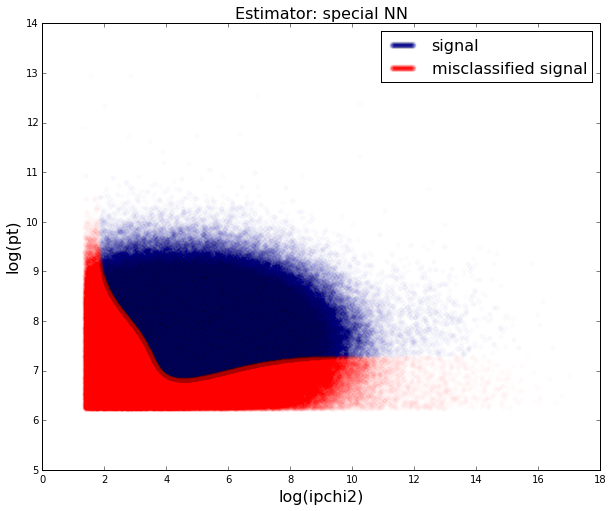

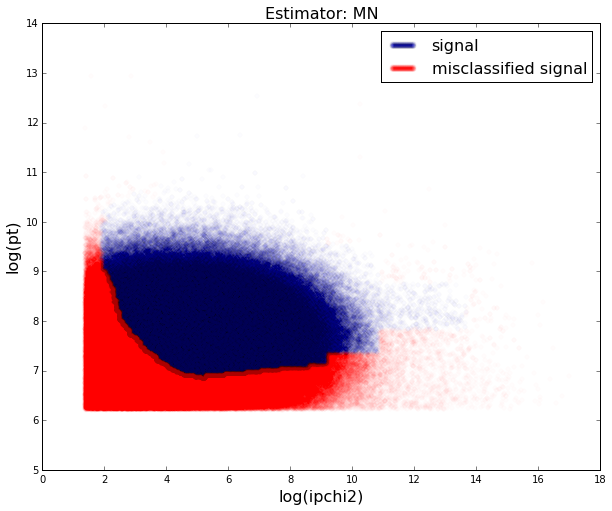

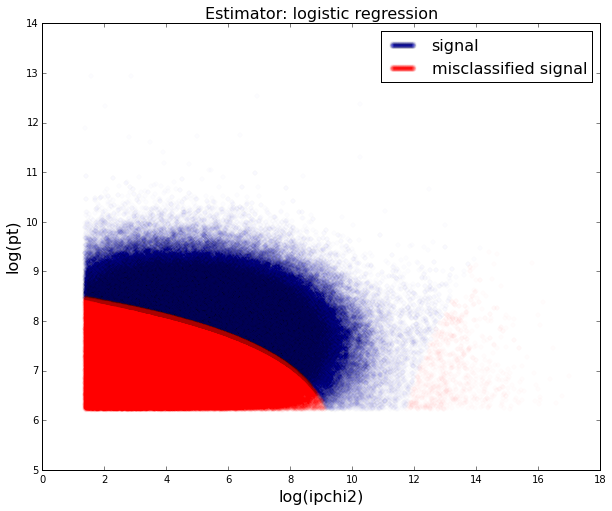

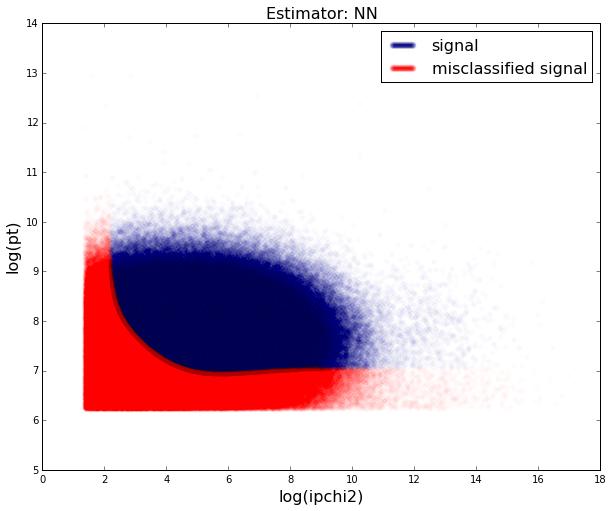

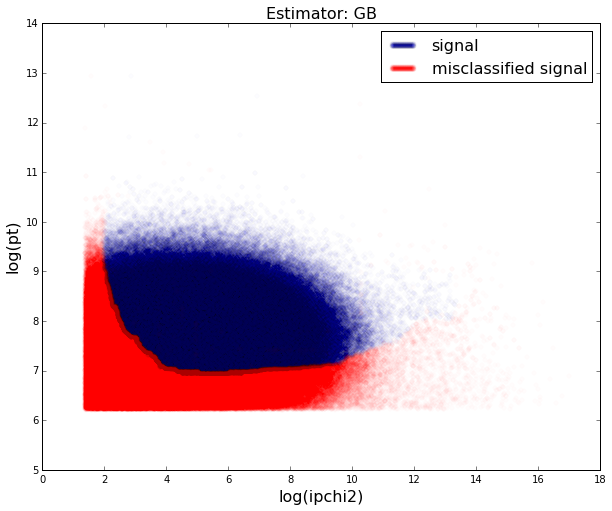

In [42]:
def plot_boundary(name, rate=100000.):
    t = thresholds[name][rate]
    prob = models[name].predict_proba(ds_test_signal)[:, 1]
    plt.figure(figsize=(10, 8))
    plt.scatter(numpy.log(ds_test_signal['ipchi2'].values[prob > t]), 
                numpy.log(ds_test_signal['pt'].values[prob > t]),
                alpha=0.01, label='signal')
    plt.scatter(numpy.log(ds_test_signal['ipchi2'].values[prob <= t]), 
                numpy.log(ds_test_signal['pt'].values[prob <= t]),
                alpha=0.01, label='misclassified signal', color='r')
    plt.legend(loc='best', fontsize=16, scatterpoints=500)
    plt.xlabel('log(ipchi2)', fontsize=16)
    plt.ylabel('log(pt)', fontsize=16)
    plt.title("Estimator: " + name, fontsize=16)
    plt.show()
    
for name in models:
    plot_boundary(name)

# Initial correlation

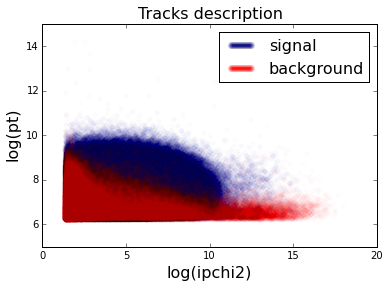

In [43]:
scatter(numpy.log(ds_test_signal['ipchi2'].values), numpy.log(ds_test_signal['pt'].values), alpha=0.01, label='signal')
scatter(numpy.log(ds_test_bck['ipchi2'].values), numpy.log(ds_test_bck['pt'].values), color='r', alpha=0.01, label='background')
legend(loc='best', fontsize=16, scatterpoints=500)
xlabel('log(ipchi2)', fontsize=16)
ylabel('log(pt)', fontsize=16)
title('Tracks description', fontsize=16)
# plt.savefig('hlt1_init.pdf' , format='pdf')

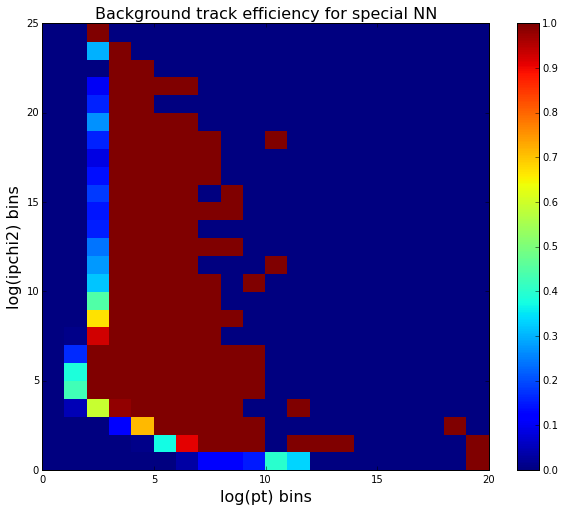

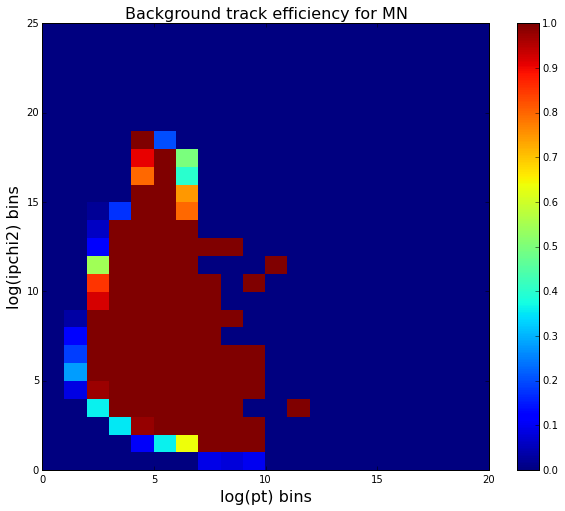

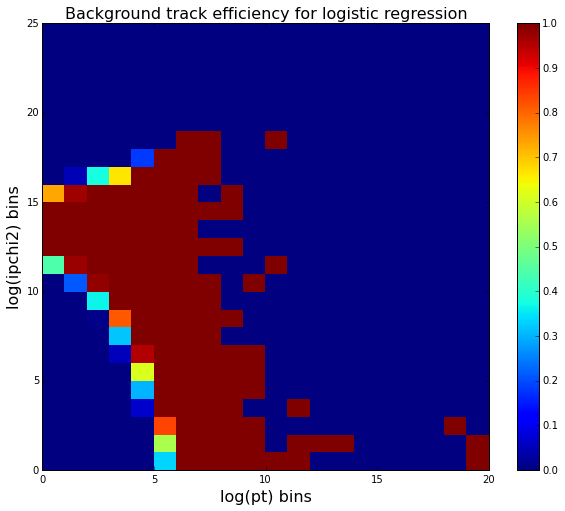

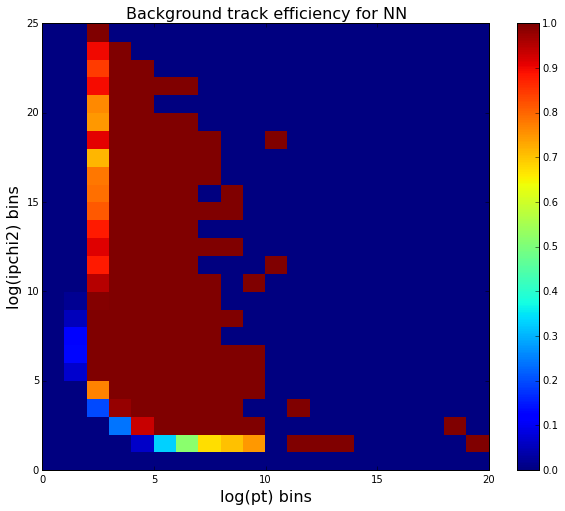

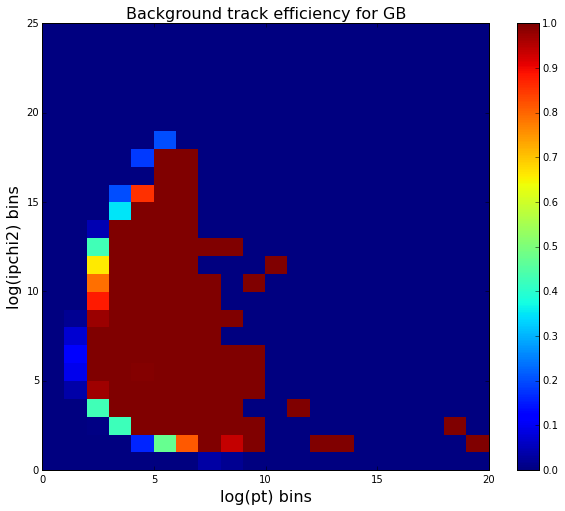

In [44]:
def plot_eff(name, rate=100000.):
    prob = models[name].predict_proba(ds_test_bck)[:, 1]
    t = thresholds[name][rate]
    cut_pass = prob > t
    matr, b1, b2 = numpy.histogram2d(numpy.log(ds_test_bck['ipchi2'].values), 
                                     numpy.log(ds_test_bck['pt'].values), bins=(25, 20),
                                     weights=cut_pass)

    matr2, b11, b22 = numpy.histogram2d(numpy.log(ds_test_bck['ipchi2'].values), 
                                        numpy.log(ds_test_bck['pt'].values), bins=(25, 20))
    figsize(10, 8)
    p = plt.pcolor(matr / (matr2 + 10e-5))
    plt.colorbar(p)
    xlabel('log(pt) bins', fontsize=16)
    title('Background track efficiency for ' + name, fontsize=16)
    ylabel('log(ipchi2) bins', fontsize=16)
    show()
    
for name in models:
    plot_eff(name)

## Final efficiencies for each mode

In [45]:
train_modes_eff, statistic = result_statistic(models, sig_train_modes_names, ds_test_signal,
                                              thresholds, [100000.], total_test_signal_events)
train_modes_eff_5, statistic_5 = result_statistic(models, sig_train_modes_names, ds_test_signal,
                                                  thresholds, [50000.], total_test_signal_events)

## rate 100000.

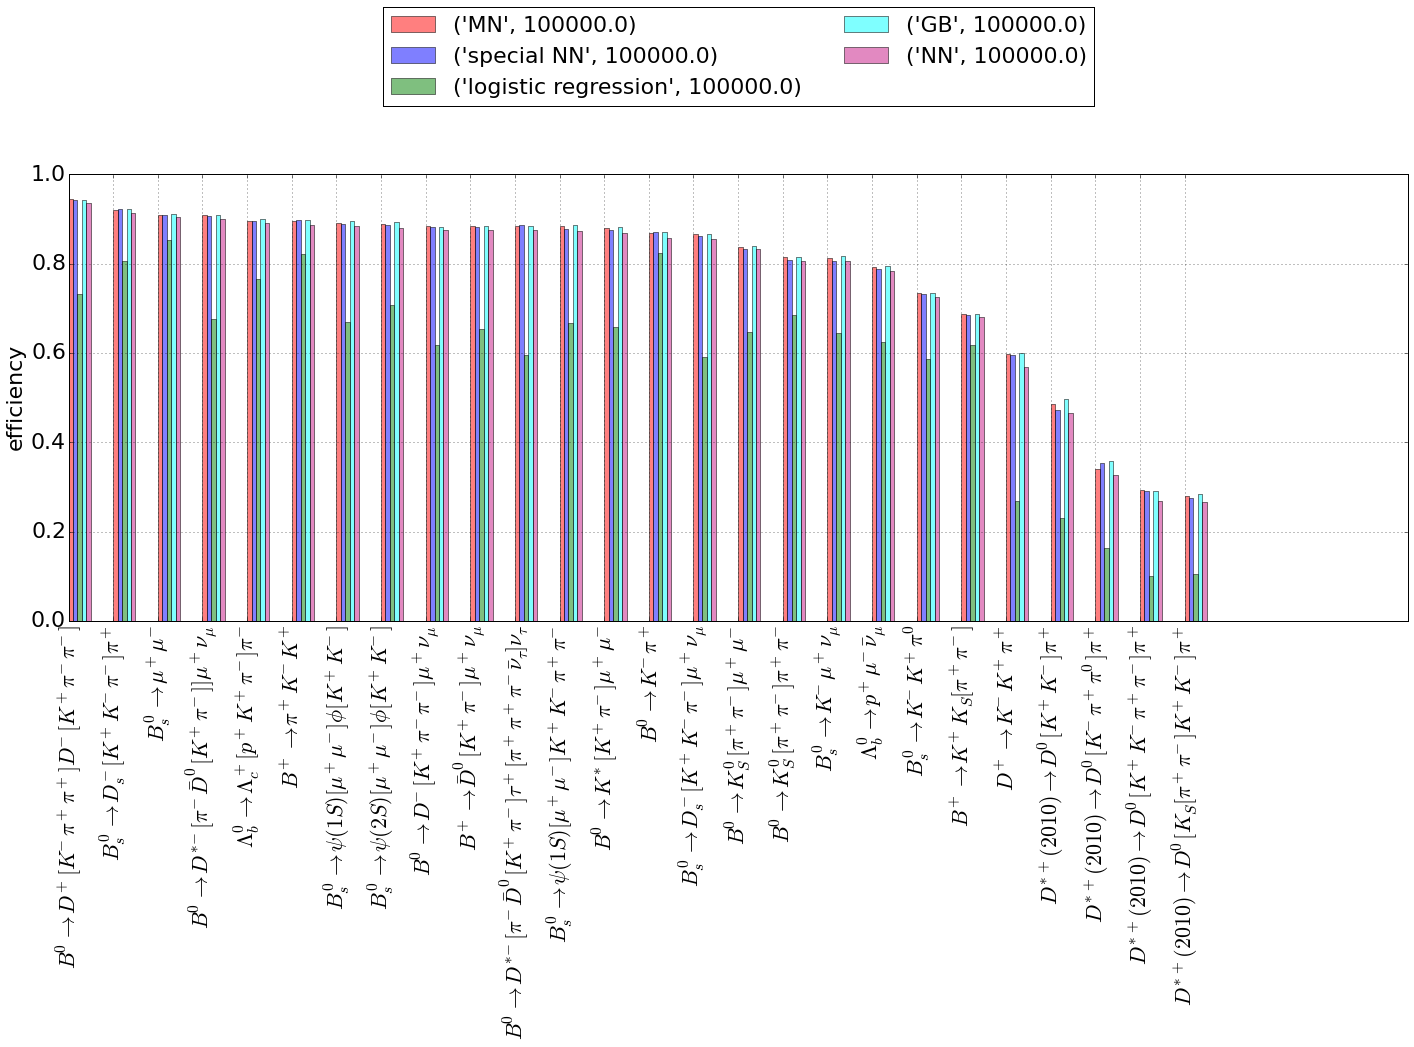

In [46]:
from rep.plotting import BarComparePlot
BarComparePlot(train_modes_eff, sortby=('MN', 100000.0)).plot(new_plot=True, figsize=(24, 8), 
                                                                  ylabel='efficiency', fontsize=22)
lgd = legend(bbox_to_anchor=(0.5, 1.4), loc='upper center', ncol=2, fontsize=22)
# plt.savefig('track.pdf' , format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

## rate 50000.

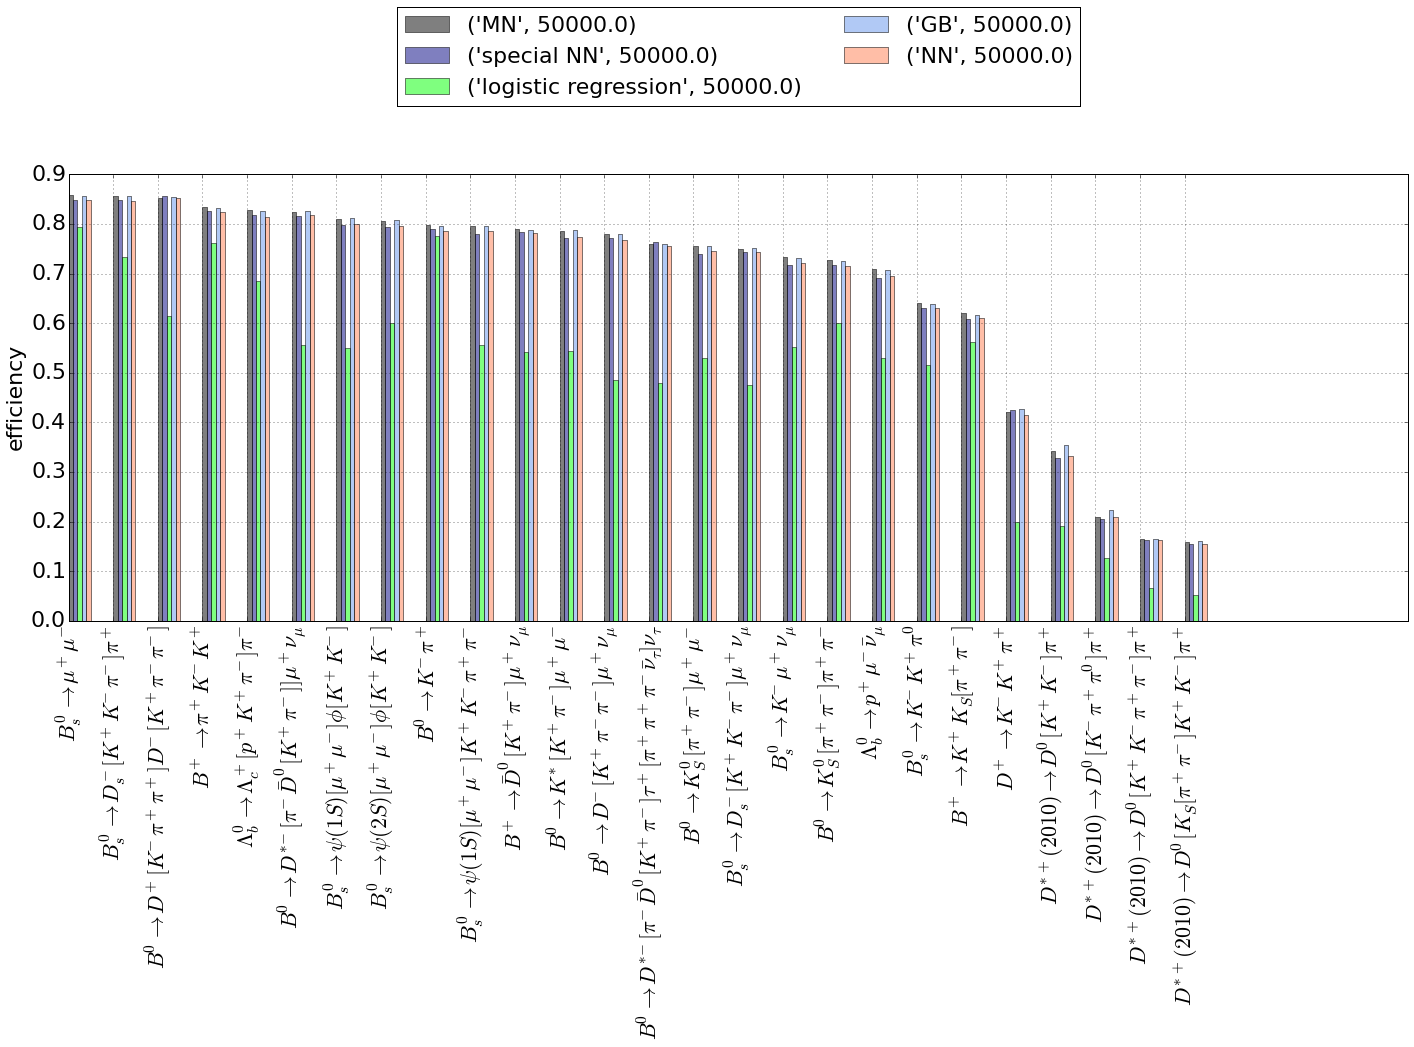

In [47]:
BarComparePlot(train_modes_eff_5, sortby=('MN', 50000.0)).plot(new_plot=True, figsize=(24, 8), 
                                                             ylabel='efficiency', fontsize=22)
lgd = legend(bbox_to_anchor=(0.5, 1.4), loc='upper center', ncol=2, fontsize=22)
# plt.savefig('track_5.pdf' , format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

## Classification report using svrs 

In [48]:
from rep.data import LabeledDataStorage
from rep.report import ClassificationReport
lds = LabeledDataStorage(test, test['signal'])
report = ClassificationReport(models, lds)

### roc curve

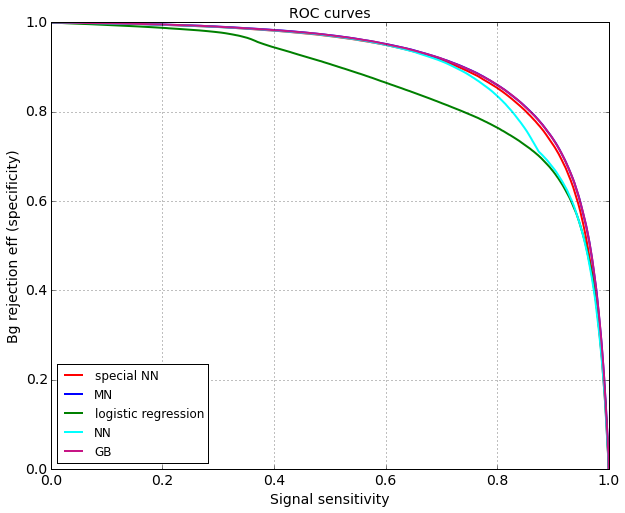

In [49]:
report.roc()

## Classification report using events

In [50]:
plots = dict()
for key, value in models.items():
    plots[key] = plot_roc_events(value, ds_test_signal, ds_test_bck, key)

special NN AUC: 0.891041937756
MN AUC: 0.893936670902
logistic regression AUC: 0.813469580865
NN AUC: 0.881963688454
GB AUC: 0.894145642956


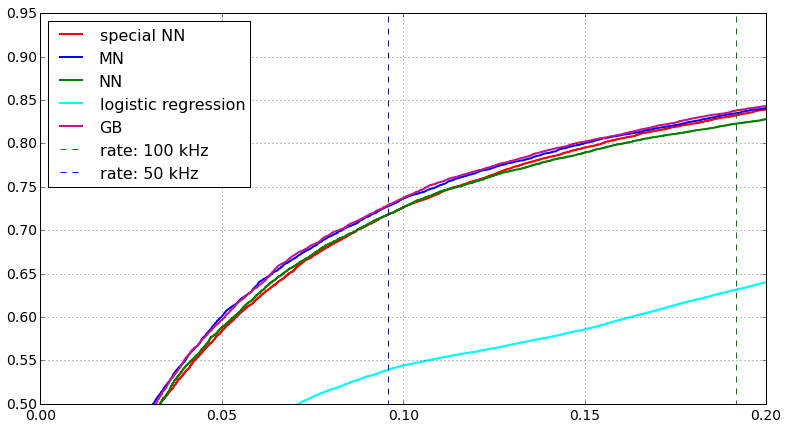

In [51]:
from rep.plotting import FunctionsPlot
FunctionsPlot(plots).plot(new_plot=True, xlim=(0, 0.2), ylim=(0.5, 0.95))
plot([1. * events_pass[100000.] / statistic_length(ds_test_bck)['Events']] * 2, [0., 1], 'g--', label='rate: 100 kHz')
plot([1. * events_pass[50000.] / statistic_length(ds_test_bck)['Events']] * 2, [0., 1], 'b--', label='rate: 50 kHz')
lgd = legend(loc='best', fontsize=16)